In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Straight Road 
# data_folders = [
#     '../data/routes_short_2023-05-05|22:07:50/', #444
#     '../data/routes_short_2023-05-18|17:31:36/', #346
#     '../data/routes_short_2023-05-22|16:42:21/'  #419
# ]

#Curve Road
data_folders = [
    '../data/routes_short_2023-05-12|17:04:09/', #814
    '../data/routes_short_2023-05-26|17:51:48/', #721
]

#NSGA Curve Road
# data_folders = [
#     '../data/routes_short_2023-05-26|13:18:12/', #216
#     '../data/routes_short_2023-05-29|15:33:07/', #393
# ]


#NSGA Straight Road
# data_folders = [
#     '../data/routes_short_2023-05-30|13:15:09/', #310 fitness score: 'RouteCompletionTest', 'CollisionTest', 'OutsideRouteLanesTest', 'Timeout'
# ]

### Time consumption for each cases

In [3]:
image_folders = []
for data_folder in data_folders:
    for sub_folder in os.listdir(data_folder):
        if not sub_folder.endswith('.csv'): 
            image_folders.append(data_folder+sub_folder)
image_folders.sort()
image_folders = image_folders[:-1]
len(image_folders), image_folders[0]

(1527, '../data/routes_short_2023-05-12|17:04:09/routes_short_05_12_17_04_19')

In [4]:
number_of_frames = []
tuple_frame_file = []
for image_folder in image_folders:
    number_of_frames.append(len(os.listdir(image_folder+"/bev")))
    tuple_frame_file.append((len(os.listdir(image_folder+"/bev")), image_folder+"/bev"))

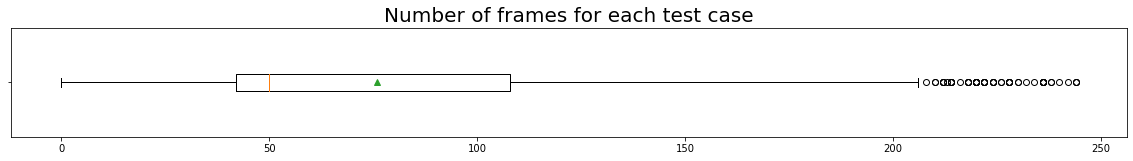

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,2))
plt.boxplot(number_of_frames, labels=[''], vert=False, showmeans=True)
plt.title("Number of frames for each test case", fontsize=20)
plt.show()

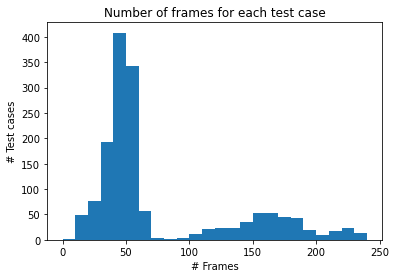

array([  1.,  48.,  77., 192., 408., 342.,  57.,   4.,   2.,   4.,  12.,
        21.,  24.,  24.,  35.,  52.,  52.,  44.,  42.,  19.,  10.,  17.,
        23.,  13.])

In [6]:
bins = plt.hist(number_of_frames, bins=range(0,250,10))
plt.title("Number of frames for each test case")
plt.ylabel('# Test cases')
plt.xlabel('# Frames')
plt.show()
bins[0]

### Fitness score and number

(1526, 14)


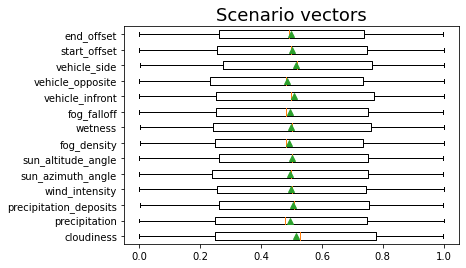

In [7]:
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

scenarios = pd.read_csv(data_folders[0]+'scenario.csv',names=scenario_header)
for i in range(1, len(data_folders)):
    scenarios = pd.concat([scenarios, pd.read_csv(data_folders[i]+'scenario.csv',names=scenario_header)])
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

(1526, 5)


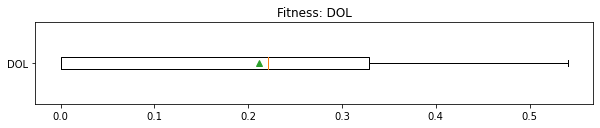

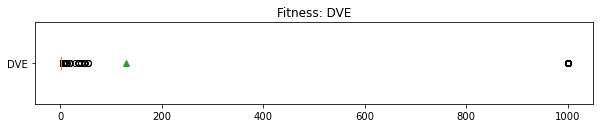

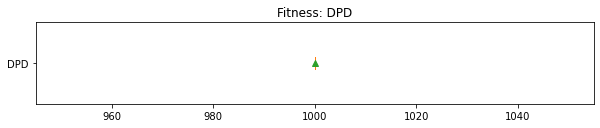

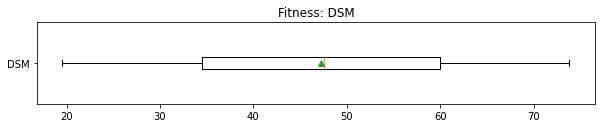

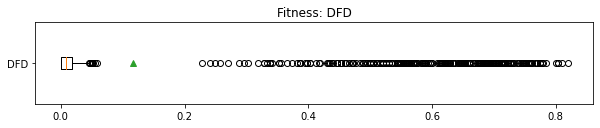

In [8]:
fitness_header = ["DOL","DVE","DPD","DSM","DFD"]
fitnesses = pd.read_csv(data_folders[0]+'fitness.csv',names=fitness_header)
for i in range(1, len(data_folders)):
    fitnesses = pd.concat([fitnesses, pd.read_csv(data_folders[i]+'fitness.csv',names=fitness_header)])
print(fitnesses.shape)
        
for fitness_label in fitness_header:
    plt.figure(figsize=(10,1.5))
    plt.boxplot(fitnesses[fitness_label], labels=[fitness_label], vert=False, showmeans=True)
    plt.title('Fitness: '+fitness_label)
    plt.show()

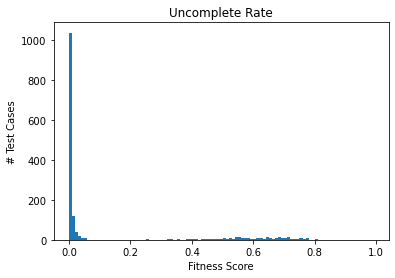

In [9]:
bins = plt.hist(fitnesses['DFD'], bins=np.arange(0,1,0.01))
plt.title('Uncomplete Rate')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()

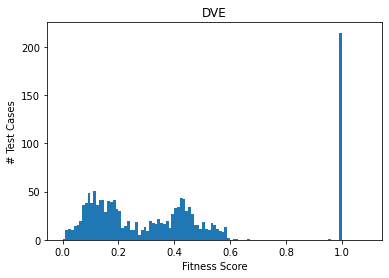

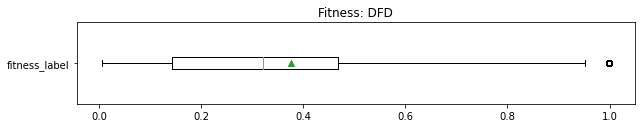

In [10]:
DVE_score = fitnesses['DVE'].to_numpy()
DVE_score = DVE_score/5
DVE_score[DVE_score>1] = 0.9999

bins = plt.hist(DVE_score, bins=np.arange(0,1.1,0.01))
plt.title('DVE')
plt.xlabel('Fitness Score')
plt.ylabel('# Test Cases')
plt.show()
        
plt.figure(figsize=(10,1.5))
plt.boxplot(DVE_score, labels=['fitness_label'], vert=False, showmeans=True)
plt.title('Fitness: '+fitness_label)
plt.show()

In [11]:
criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]
criterions = pd.read_csv(data_folders[0]+'criterion-replace.csv',names=criterion_header)
for i in range(1, len(data_folders)):
    criterions = pd.concat([criterions, pd.read_csv(data_folders[i]+'criterion.csv',names=criterion_header)])
print(criterions.shape)
criterions.head()

(1526, 15)


,RouteCompletionTest,RouteCompletionTest_figure,OutsideRouteLanesTest,OutsideRouteLanesTest_figure,CollisionTest,CollisionTest_figure,RunningRedLightTest,RunningRedLightTest_figure,RunningStopTest,RunningStopTest_figure,InRouteTest,InRouteTest_figure,AgentBlockedTest,AgentBlockedTest_figure,Timeout
0,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
1,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
2,0,100.00,0,0.00,0,0,0,0,0,0,0,0,0,0,0
3,1,27.80,1,60.94,1,1,0,0,0,0,0,0,0,0,0
4,1,94.98,0,0.00,0,0,0,0,0,0,0,0,0,0,1


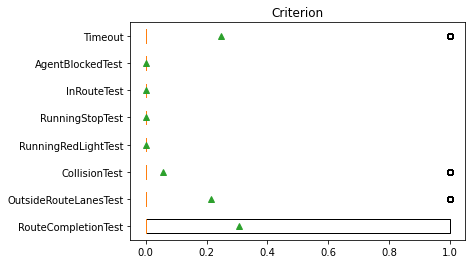

In [12]:
criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        "RunningRedLightTest",   
                        "RunningStopTest",       
                        "InRouteTest", 
                        "AgentBlockedTest",
                        "Timeout"]
# plt.figure(figsize=(10,1.5))
plt.boxplot(criterions[criterion_bool_head], labels=criterion_bool_head, vert=False, showmeans=True)
plt.title('Criterion')
plt.show()

In [13]:
criterions[criterion_bool_head][criterions[criterion_bool_head].sum(axis=1) == 3]

,RouteCompletionTest,OutsideRouteLanesTest,CollisionTest,RunningRedLightTest,RunningStopTest,InRouteTest,AgentBlockedTest,Timeout
3,1,1,1,0,0,0,0,0
6,1,1,0,0,0,0,0,1
16,1,1,1,0,0,0,0,0
27,1,1,1,0,0,0,0,0
28,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
689,1,1,1,0,0,0,0,0
694,1,1,1,0,0,0,0,0
701,1,1,1,0,0,0,0,0
703,1,1,0,0,0,0,0,1


In [14]:
print(len(criterions))
(criterions[criterion_bool_head] == 1).sum()

1526


RouteCompletionTest      467
OutsideRouteLanesTest    326
CollisionTest             89
RunningRedLightTest        0
RunningStopTest            0
InRouteTest                0
AgentBlockedTest           0
Timeout                  378
dtype: int64

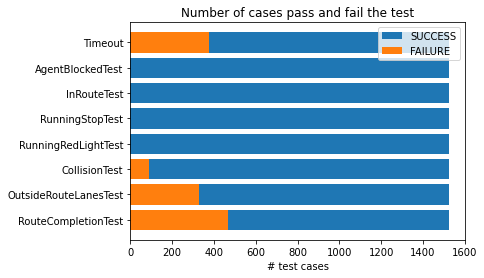

In [15]:
import matplotlib.pyplot as plt

plt.barh(criterion_bool_head, [criterions.shape[0]]*8)
plt.barh(criterion_bool_head, (criterions[criterion_bool_head] == 1).sum())
plt.legend(['SUCCESS','FAILURE'])
plt.title('Number of cases pass and fail the test')
plt.xlabel('# test cases')
plt.show()

(-0.1428, 1.0)


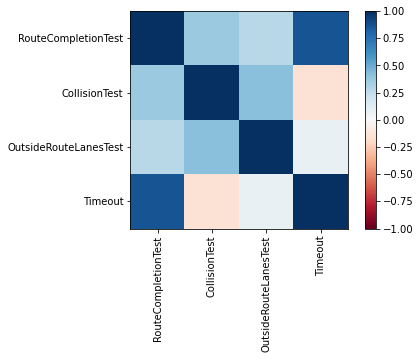

In [16]:
# select_criterions = ["RouteCompletionTest", "CollisionTest", "RunningRedLightTest", "Timeout"]
select_criterions = ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"] 

scenario_criterion = pd.concat([scenarios, criterions[select_criterions]],axis=1)

print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[14:18, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[14:18, 14:18].max(), 4)))

plt.imshow(scenario_criterion.corr().to_numpy()[14:18,14:18], cmap='RdBu', vmin=-1, vmax=1)
plt.yticks(range(4),scenario_criterion.columns.tolist()[14:18])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()

(-0.1088, 0.6199)


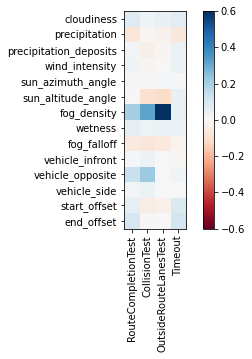

In [17]:
scenario_criterion = pd.concat([scenarios, criterions[select_criterions]],axis=1)

print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))

plt.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.6, vmax=0.6)
plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
plt.colorbar()
plt.show()
# Positive means easy to cause failure

In [18]:
importance = []
for i, name in enumerate(scenario_criterion.columns.tolist()[:14]):
    importance.append((sum(scenario_criterion.corr().to_numpy()[:14, 14:18][i]**2)**0.5, name))
importance.sort()
importance

[(0.014604688644378158, 'sun_azimuth_angle'),
 (0.03563777853904182, 'vehicle_infront'),
 (0.042140981505714124, 'vehicle_side'),
 (0.05172717697954715, 'wind_intensity'),
 (0.05725854750040236, 'precipitation_deposits'),
 (0.08085722690949028, 'wetness'),
 (0.10302257450353236, 'precipitation'),
 (0.10904465255059707, 'fog_falloff'),
 (0.11547634634874927, 'start_offset'),
 (0.11861474766520103, 'cloudiness'),
 (0.15056683034142593, 'sun_altitude_angle'),
 (0.15212847256857323, 'end_offset'),
 (0.2572717863019977, 'vehicle_opposite'),
 (0.7247790351844327, 'fog_density')]

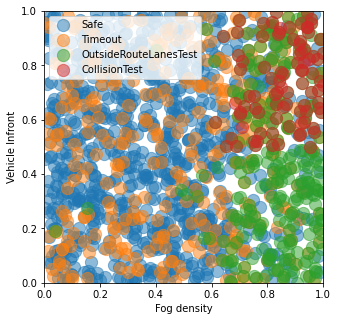

In [22]:
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt

# X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
# pca = PCA(n_components=2)
# # pca = PCA()
# pca.fit(X)

test_target = ['RouteCompletionTest','Timeout','OutsideRouteLanesTest','CollisionTest']
factors = ['fog_density', 'vehicle_opposite']

# colors = ['#BCCBE5', '#FFD5AB', '#FFCCC3', '#B1D0A9', '#C1BCBF', '#E5CDCC']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
s=150 
alpha = 0.5

# Plot
success_case = scenario_criterion[test_target].sum(axis=1) == 0
plt.figure(figsize=(5,5))
plt.scatter(scenario_criterion[factors[0]][success_case], 
            scenario_criterion[factors[1]][success_case],
            c = colors[0], s=s, alpha=alpha)

for i, certion_label in enumerate(test_target[1:]):
    plt.scatter(scenario_criterion[factors[0]][(scenario_criterion[certion_label] == 1)], 
                scenario_criterion[factors[1]][(scenario_criterion[certion_label] == 1)],
                c = colors[i+1], s=s, alpha=alpha)


plt.xlim((0,1))
plt.ylim((0,1))
plt.legend(['Safe']+test_target[1:])

plt.xlabel('Fog density')
plt.ylabel('Vehicle Infront')

plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import joblib

seed = 42

max_f1_sum = 0
# for i in range(1,11,1):
for i in range(6,7):

    print("max_depth:",i)
    print("                      | Train F1 | Test F1")
    print("------------------------------------------")
    f1_sum = 0
    for certion_label in ["RouteCompletionTest", "CollisionTest", "OutsideRouteLanesTest", "Timeout"]:
        X = scenario_criterion[scenario_criterion.columns.tolist()[:14]].to_numpy()
        y = scenario_criterion[certion_label].to_numpy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)


        clf = RandomForestClassifier(max_depth=i, random_state=seed, class_weight={0:sum(y==1)/len(y), 1:sum(y==0)/len(y)})
        # clf = LogisticRegression(random_state=seed)
        clf.fit(X_train, y_train)

        acc = sum(clf.predict(X_test)==y_test)/len(y_test)
        print("{:>21} | {:0<7}  | {:0<7}".format(
            certion_label,
            round(f1_score(clf.predict(X_train), y_train), 5), 
            round(f1_score(clf.predict(X_test), y_test), 5)
        ))

        joblib.dump(clf, 'models/RF-{}.pkl'.format(certion_label))
        # print(clf.predict(X_test))
        f1_sum += f1_score(clf.predict(X_test), y_test)
    print()
    print()


max_depth: 6
                      | Train F1 | Test F1
------------------------------------------
  RouteCompletionTest | 0.85053  | 0.60000
        CollisionTest | 0.81633  | 0.60317
OutsideRouteLanesTest | 0.94043  | 0.87273
              Timeout | 0.89532  | 0.36181




In [32]:
clf = joblib.load('models/RF-Timeout.pkl')
acc = sum(clf.predict(X_test)==y_test)/len(y_test)
print("{:>21} | {:0<7}  | {:0<7}".format(
    certion_label,
    round(f1_score(clf.predict(X_train), y_train), 5), 
    round(f1_score(clf.predict(X_test), y_test), 5)
))

              Timeout | 0.89532  | 0.36181


In [34]:
X_train[0]

array([0.60377571, 0.67181049, 0.88049541, 0.35401359, 0.73358622,
       0.16193236, 0.36153101, 0.44554131, 0.87128079, 0.44287088,
       0.79365702, 0.40225433, 0.35447406, 0.83229216])

In [35]:
clf.predict([X_train[0]])

array([0])

: 

In [90]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(14, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [91]:
mlp = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [36]:
input = """
[[2.52325745e-01, 7.43825854e-01, 1.95429481e-01, 5.81358927e-01, 9.70019989e-01, 8.46828801e-01, 2.39847759e-01, 4.93769714e-01, 6.19955718e-01, 8.28980900e-01, 1.56791395e-01, 1.85762022e-02, 7.00221437e-02, 4.86345111e-01],
 [4.33676349e-01, 8.07360529e-01, 3.15244803e-01, 8.92888709e-01, 5.77857215e-01, 1.84010202e-01, 7.87929234e-01, 6.12031177e-01, 5.39092721e-02, 4.20193680e-01, 6.79068837e-01, 9.18601778e-01, 4.02024891e-04, 9.76759149e-01],
 [6.06329462e-01, 5.83295036e-01, 3.17362409e-01, 9.88616154e-01, 5.79745219e-01, 3.80141173e-01, 1.95417695e-01, 7.40120535e-01, 7.26685344e-01, 2.64919558e-01, 6.63348344e-02, 3.70084198e-01, 6.29717507e-01, 2.10174010e-01],
 [3.44736653e-01, 9.40107482e-01, 5.82014180e-01, 8.78831984e-01, 8.44734445e-01, 9.05392319e-01, 4.59880266e-01, 5.46346816e-01, 7.98603591e-01, 2.85718852e-01, 4.90253523e-01, 5.99110308e-01, 1.55332756e-02, 5.93481408e-01],
 [2.80443992e-01, 7.89279328e-01, 1.03226007e-01, 4.47893526e-01, 9.08595503e-01, 2.93614148e-01, 2.87775339e-01, 1.30028572e-01, 1.93669579e-02, 6.78835533e-01, 2.11628116e-01, 2.65546659e-01, 4.91573159e-01, 5.33625451e-02],
 [9.03401915e-01, 1.37474704e-01, 1.39276347e-01, 8.07391289e-01, 3.97676837e-01, 1.65354197e-01, 9.27508580e-01, 3.47765860e-01, 7.50812103e-01, 7.25997985e-01, 8.83306091e-01, 6.23672207e-01, 7.50942434e-01, 3.48898342e-01],
 [3.94875613e-01, 9.63262528e-01, 1.73955667e-01, 1.26329519e-01, 1.35079158e-01, 5.05662166e-01, 2.15248053e-02, 9.47970211e-01, 8.27115471e-01, 1.50189807e-02, 1.76196256e-01, 3.32063574e-01, 1.30996845e-01, 8.09490692e-01],
 [5.64095099e-01, 6.70467510e-01, 3.17593681e-01, 5.58689828e-01, 1.40386939e-01, 3.69594965e-01, 8.02377821e-01, 9.68261576e-01, 3.20080299e-01, 2.69613801e-01, 8.34657676e-02, 9.37242997e-01, 8.50442114e-02, 3.90547832e-02],
 [5.74117605e-01, 1.46728575e-01, 5.89305537e-01, 6.99758360e-01, 1.02334429e-01, 4.14055988e-01, 6.94400158e-01, 4.14179270e-01, 4.99534589e-02, 5.35896406e-01, 6.63794645e-01, 5.14889112e-01, 9.44594756e-01, 5.86555041e-01],
 [7.15495045e-02, 5.68851437e-01, 4.17073531e-01, 9.88616154e-01, 5.79745219e-01, 2.08647697e-01, 5.49314965e-01, 7.45334431e-01, 6.71691475e-01, 6.87628385e-01, 8.60182789e-01, 3.77634236e-01, 6.29717507e-01, 2.10174010e-01],
 [4.23104520e-01, 5.68851437e-01, 9.78538975e-02, 4.37535653e-01, 5.71228949e-01, 3.80141173e-01, 5.95068434e-01, 7.45334431e-01, 6.73077859e-01, 2.97691041e-01, 6.63348344e-02, 2.86564887e-01, 2.88193516e-02, 2.10174010e-01],
 [9.07929403e-03, 6.71556167e-01, 4.17304802e-01, 4.30567827e-01, 1.40386939e-01, 1.97905108e-01, 8.00205224e-01, 9.68261576e-01, 3.13424178e-01, 6.94643094e-01, 8.76389152e-01, 8.94606664e-01, 8.52312212e-02, 9.81618524e-01],
 [9.74740371e-01, 6.36604400e-01, 9.93913025e-01, 5.46070804e-01, 5.26425934e-01, 1.35427903e-01, 3.55705171e-01, 2.62185673e-02, 1.60395180e-01, 7.45637193e-01, 3.03996899e-02, 3.66543097e-01, 8.62346253e-01, 6.92677718e-01],
 [3.83903537e-01, 6.36604400e-01, 1.83056969e-01, 1.26629939e-01, 5.26425934e-01, 1.59836271e-01, 1.74447160e-02, 3.04857908e-02, 8.12952900e-01, 7.64683015e-01, 1.75482967e-01, 3.66543097e-01, 9.27870644e-02, 8.20373840e-01],
 [7.52755554e-01, 6.65364814e-02, 2.60315099e-01, 8.04754564e-01, 1.03210073e-01, 6.39460881e-01, 5.24670309e-01, 3.82669627e-01, 4.33074104e-02, 4.52029311e-02, 6.66375232e-01, 7.72178030e-01, 9.06303962e-01, 9.31972069e-01],
 [4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01, 1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01, 3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01, 2.04452250e-01, 8.78117436e-01],
 [4.64049791e-01, 8.10787588e-01, 9.83468338e-02, 5.49229627e-01, 9.57889530e-01, 1.88728720e-01, 6.81637693e-01, 3.15515631e-01, 7.02374422e-01, 8.76643631e-01, 1.82882773e-02, 7.54605374e-01, 1.61061065e-02, 2.80617259e-02],
 [9.03401915e-01, 1.37474704e-01, 1.39276347e-01, 8.07391289e-01, 3.97676837e-01, 1.65354197e-01, 9.27508580e-01, 3.47765860e-01, 7.50812103e-01, 7.25997985e-01, 8.83306091e-01, 5.99439907e-01, 7.50942434e-01, 3.48898342e-01],
 [2.73875932e-02, 6.70467510e-01, 4.17304802e-01, 5.58689828e-01, 1.40386939e-01, 1.98101489e-01, 8.00744569e-01, 9.68261576e-01, 3.13424178e-01, 6.92322616e-01, 8.76389152e-01, 8.94606664e-01, 8.50442114e-02, 3.90547832e-02],
 [4.28202018e-01, 8.11876245e-01, 9.83468338e-02, 4.21107625e-01, 9.57889530e-01, 5.36859419e-01, 6.92121837e-01, 3.15515631e-01, 7.01957195e-01, 8.39623955e-01, 1.82882773e-02, 7.54637038e-01, 9.88141374e-01, 9.75660613e-01],
 [3.24362460e-01, 8.72922376e-01, 8.44709608e-01, 5.38440593e-01, 8.66608274e-01, 9.49805991e-01, 8.26406998e-01, 8.54115444e-01, 9.87434018e-02, 6.51304332e-01, 7.03516988e-01, 6.10240813e-01, 7.99615262e-01, 3.45712199e-02],
 [4.36065476e-01, 8.11876245e-01, 9.83468338e-02, 4.21107625e-01, 9.57889530e-01, 1.88532339e-01, 6.81098348e-01, 3.15515631e-01, 7.02374422e-01, 8.34625672e-01, 1.82882773e-02, 7.54605374e-01, 1.62905450e-02, 9.75660613e-01],
 [5.74117605e-01, 1.46728575e-01, 5.89305537e-01, 6.99758360e-01, 1.92558638e-01, 4.14055988e-01, 6.94400158e-01, 9.54687739e-01, 2.69975261e-01, 5.57731593e-01, 7.24375094e-01, 5.14889112e-01, 9.46106646e-01, 5.86555041e-01],
 [9.80194069e-01, 9.63262528e-01, 9.72460364e-01, 5.45773867e-01, 1.35079158e-01, 5.05662166e-01, 5.42944839e-01, 9.47612375e-01, 1.74563881e-01, 1.23349766e-02, 3.11215227e-02, 3.32063574e-01, 7.07637172e-01, 6.81794570e-01],
 [7.52755554e-01, 6.65364814e-02, 2.60315099e-01, 8.04754564e-01, 1.93434283e-01, 6.39460881e-01, 5.24670309e-01, 9.24807970e-01, 2.63296770e-01, 6.59610907e-02, 7.35065963e-01, 7.72178030e-01, 9.07815853e-01, 9.31972069e-01],
 [6.70788791e-01, 4.50873936e-01, 3.82102752e-01, 4.10811350e-01, 4.01479583e-01, 3.17383946e-01, 6.21919368e-01, 4.30247271e-01, 9.73802078e-01, 6.77800891e-01, 1.98569888e-01, 4.26701009e-01, 3.43346240e-01, 7.97638804e-01],
 [1.35506123e-01, 8.73626787e-01, 3.15244803e-01, 8.92888709e-01, 4.10836493e-01, 5.28643200e-01, 7.98708000e-01, 6.12031177e-01, 4.06749931e-02, 4.20193680e-01, 6.79068837e-01, 9.14140669e-01, 9.80489645e-01, 7.49078614e-01],
 [9.74740371e-01, 6.36604400e-01, 9.93913025e-01, 5.46070804e-01, 5.26425934e-01, 1.59836271e-01, 4.17771226e-01, 2.62185673e-02, 1.60395180e-01, 7.45637193e-01, 3.03996899e-02, 3.66543097e-01, 6.69160659e-01, 6.92677718e-01],
 [6.19290418e-01, 8.11876245e-01, 3.17855485e-01, 9.67060457e-01, 9.65675401e-01, 1.88532339e-01, 6.81098348e-01, 3.15515631e-01, 6.98529456e-01, 8.34625672e-01, 1.82882773e-02, 7.54605374e-01, 6.21755803e-01, 9.75660613e-01],
 [5.52821979e-01, 8.42030892e-01, 1.24173315e-01, 2.79183679e-01, 5.85759271e-01, 9.69595748e-01, 5.61030219e-01, 1.86472894e-02, 8.00632673e-01, 2.32974274e-01, 8.07105196e-01, 3.87860644e-01, 8.63541855e-01, 7.47121643e-01]]"""
# def replace(str, target, content):
#     result = ''
#     while True:
#         result = str.replace(target,content)
#         if result == str:
#           break
#         else:
#            str = result
#     return result

# input = replace(input, '\n', ' ')
# input = replace(input, '  ', ' ')
# input = replace(input, ' ', ',')
# input = replace(input, ']', '],')
# input = replace(input, ',,', ',')
# .replace('\n', ' ').replace('  ', ' ').replace(' ',',').replace(',,',',').replace(',,',',').replace(']','],')
# print(eval(input))
data = eval(input)
len(data)

30

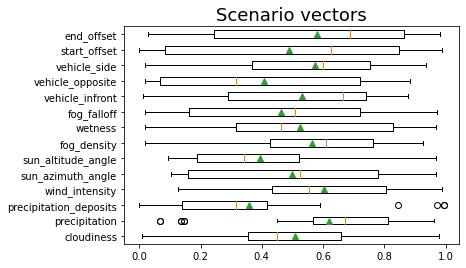

In [43]:
import pandas as pd
scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]
pddata = pd.DataFrame(data,columns=scenario_header)

# plt.figure(figsize=(20,2))
plt.boxplot(pddata, labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()

### NSGA VS Random Selected

In [3]:
NSGA_data  = '../data/routes_short_2023-05-29|15:33:07/'
curve_data = '../data/routes_short_2023-05-26|17:51:48/'

criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        # "RunningRedLightTest",   
                        # "RunningStopTest",       
                        # "InRouteTest", 
                        # "AgentBlockedTest",
                        "Timeout"]

scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"] 


In [4]:
curve_criterions = pd.read_csv(curve_data+'criterion.csv',names=criterion_header)
curve_scenarios = pd.read_csv(curve_data+'scenario.csv',names=scenario_header)

NSGA_criterions = pd.read_csv(NSGA_data+'criterion.csv',names=criterion_header)
NSGA_scenarios = pd.read_csv(NSGA_data+'scenario.csv',names=scenario_header)

print(curve_criterions.shape)
print(NSGA_criterions.shape)

print(curve_scenarios.shape)
print(NSGA_scenarios.shape)

(717, 15)
(390, 15)
(717, 14)
(390, 14)


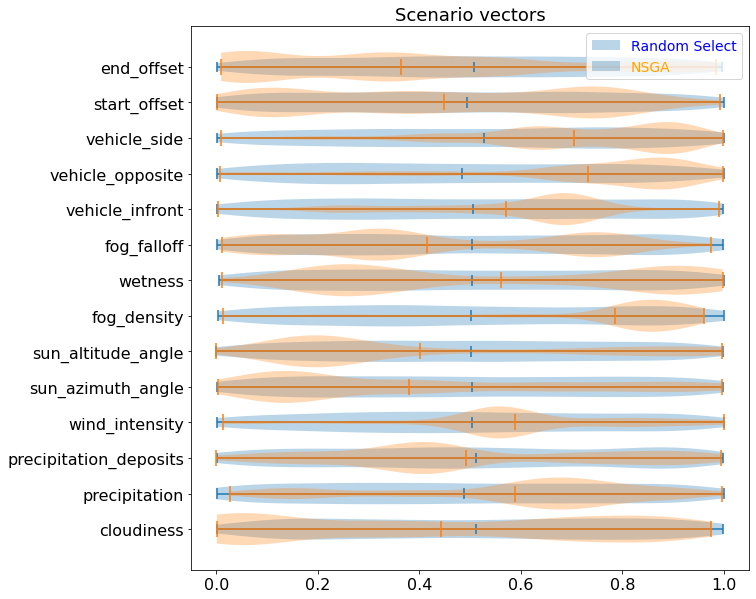

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.violinplot(curve_scenarios, vert=False, showmeans=True, widths=0.6)
plt.violinplot(NSGA_scenarios, vert=False, showmeans=True, widths=0.9)
plt.yticks(range(1, 15), scenario_header,fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(['Random Select','NSGA'],labelcolor=['blue','orange'],fontsize=14)

plt.show()

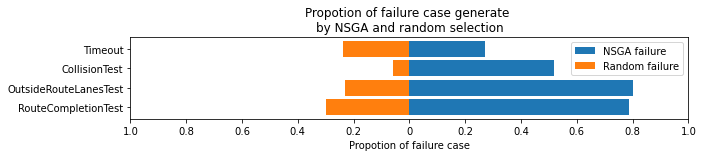

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,1.5))
plt.barh(criterion_bool_head, (NSGA_criterions[criterion_bool_head] == 1).sum()/len(NSGA_criterions))
plt.barh(criterion_bool_head, -(curve_criterions[criterion_bool_head] == 1).sum()/len(curve_criterions))
plt.legend(['NSGA failure','Random failure'])
plt.title('Propotion of failure case generate \nby NSGA and random selection')
plt.xlabel('Propotion of failure case')
plt.xticks(np.arange(-1,1.2,0.2),[1.0,0.8,0.6,0.4,0.2,0,0.2,0.4,0.6,0.8,1.0])
plt.show()

(-0.1238, 0.6286)
(-0.3087, 0.7539)


/home/guannan/miniconda3/envs/TCP/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


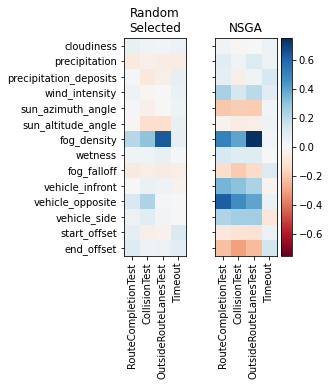

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(3.2, 4), sharey=True)


ax1.set_title('Random\nSelected')
scenario_criterion = pd.concat([curve_scenarios, curve_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig1 = ax1.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)
# plt.yticks(range(14),scenario_criterion.columns.tolist()[:14])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)

ax2.set_title('NSGA')
scenario_criterion = pd.concat([NSGA_scenarios, NSGA_criterions[select_criterions]],axis=1)
print("({}, {})".format(round(scenario_criterion.corr().to_numpy()[:14, 14:18].min(), 4), 
                        round(scenario_criterion.corr().to_numpy()[:14, 14:18].max(), 4)))
fig2 = ax2.imshow(scenario_criterion.corr().to_numpy()[:14, 14:18], cmap='RdBu', vmin=-0.75, vmax=0.75)

ax1.set_yticks(range(14),scenario_criterion.columns.tolist()[:14])
ax1.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
ax2.set_xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
# plt.yticks([])
# plt.xticks(range(4),scenario_criterion.columns.tolist()[14:18],rotation=90)
fig.colorbar(fig1, cmap='RdBu')

plt.show()

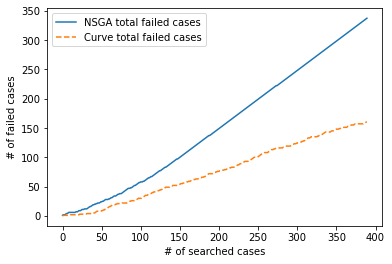

In [53]:
import matplotlib.pyplot as plt

select_criterions = ['RouteCompletionTest', 'CollisionTest', 'OutsideRouteLanesTest', 'Timeout']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
ax.plot(range(len(NSGA_criterions)), get_sum_overtime(NSGA_criterions[select_criterions].sum(axis=1) > 0), label='NSGA total failed cases')
ax.plot(range(len(NSGA_criterions)), get_sum_overtime(curve_criterions[select_criterions][:len(NSGA_criterions)].sum(axis=1) > 0 ), '--', label='Curve total failed cases')

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

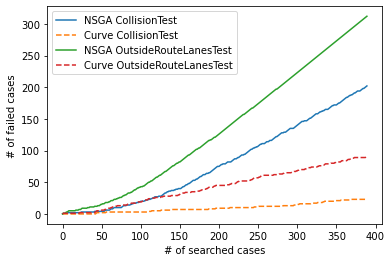

In [54]:
import matplotlib.pyplot as plt

select_criterions = ['CollisionTest', 'OutsideRouteLanesTest']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
for criterion in select_criterions:
    ax.plot(range(len(NSGA_criterions)), get_sum_overtime(NSGA_criterions[criterion]), label='NSGA '+criterion)
    ax.plot(range(len(NSGA_criterions)), get_sum_overtime(curve_criterions[criterion][:len(NSGA_criterions)]), '--', label='Curve '+criterion)

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

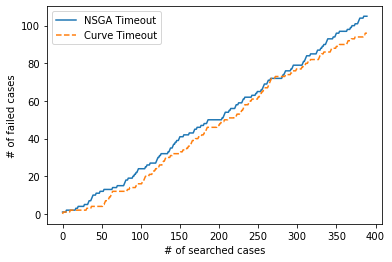

In [55]:
import matplotlib.pyplot as plt

select_criterions = ['Timeout']

def get_sum_overtime(array):
    result = []
    sum = 0
    for data in array:
        sum += data
        result.append(sum)
    return result

fig, ax = plt.subplots()
for criterion in select_criterions:
    ax.plot(range(len(NSGA_criterions)), get_sum_overtime(NSGA_criterions[criterion]), label='NSGA '+criterion)
    ax.plot(range(len(NSGA_criterions)), get_sum_overtime(curve_criterions[criterion][:len(NSGA_criterions)]), '--', label='Curve '+criterion)

plt.xlabel('# of searched cases')
plt.ylabel('# of failed cases')
plt.legend()
plt.show()

### Surrogate Data

In [2]:
import os
import numpy as np
os.getcwd()

'/home/guannan/Projects/TCP/tools'

In [3]:
data = np.load('../surrogate/routes_short_2023-05-31|15:23:31-output.npz')
data['arr_0'].shape


(50, 14)

In [5]:
file = open('../surrogate/routes_short_2023-05-31|15:47:49/scenario.csv','r')
lines = file.readlines()

In [12]:
np.genfromtxt('../surrogate/routes_short_2023-05-31|15:47:49/scenario.csv', delimiter=',')[0]


array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01, 4.19194514e-01, 6.85219500e-01,
       2.04452250e-01, 8.78117436e-01])

(390, 14)


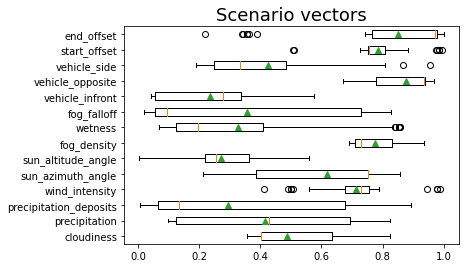

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

scenarios = pd.read_csv('../surrogate/routes_short_2023-05-31|15:47:49/scenario.csv',names=scenario_header)
print(scenarios.shape)
        
# plt.figure(figsize=(20,2))
plt.boxplot(scenarios[-50:], labels=scenario_header, vert=False, showmeans=True)
plt.title("Scenario vectors", fontsize=18)
plt.show()